In [14]:
!python -V

Python 3.9.19


In [15]:
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [17]:
import pickle
import warnings
warnings.filterwarnings('ignore')

In [18]:
import mlflow

mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("first-experiment")

<Experiment: artifact_location='/workspaces/mlops-practice/02-exp-tracking/mlruns/1', creation_time=1718246543216, experiment_id='1', last_update_time=1718246543216, lifecycle_stage='active', name='first-experiment', tags={}>

In [58]:
# !pip install pyarrow

In [59]:
print(f"pandas version = {pd.__version__}")
print(f"sklearn version = {sklearn.__version__}")

pandas version = 2.2.2
sklearn version = 1.5.0


In [60]:
# df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet')
# df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


In [61]:
# df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2964624 entries, 0 to 2964623
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [62]:
# df_filter = df.copy()
# df_filter = df_filter.sample(n=50000).reset_index(drop=True)

In [63]:
# # Duration (Dropoff - Pickup)
# df_filter['duration'] = df_filter.tpep_dropoff_datetime -  df_filter.tpep_pickup_datetime
# df_filter['duration'] = df_filter.duration.apply(lambda td: td.total_seconds()/ 60)
# df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0


# Duration

In [64]:
# df_filter.duration.describe()

count    50000.000000
mean        15.524056
std         31.432302
min         -0.500000
25%          7.133333
50%         11.725000
75%         18.666667
max       1437.216667
Name: duration, dtype: float64

In [65]:
# df_filter.duration.describe(percentiles=[0.95,0.98,0.99])

count    50000.000000
mean        15.524056
std         31.432302
min         -0.500000
50%         11.725000
95%         37.868333
98%         50.617000
99%         60.417000
max       1437.216667
Name: duration, dtype: float64

In [66]:
# # Filter the DataFrame to include only rows where duration > 0 and duration <= 120 minutes
# df_filter = df_filter[(df_filter.duration > 0) & (df_filter.duration <= 120)]

In [67]:
# df_filter.duration.max()

118.68333333333334

# Passenger Count

In [68]:
# df_filter.passenger_count.describe()

count    47529.000000
mean         1.334070
std          0.841425
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: passenger_count, dtype: float64

In [69]:
# # Filter the DataFrame to include only rows where passenger_count > 0
# df_filter = df_filter[df_filter.passenger_count > 0]

# Fare Amount

In [70]:
# df_filter.fare_amount.describe()

count    46971.000000
mean        18.009568
std         17.958714
min       -133.000000
25%          8.600000
50%         12.800000
75%         19.800000
max        353.000000
Name: fare_amount, dtype: float64

In [71]:
# # Filter the DataFrame to include only rows where fare_amount > 0
# df_filter = df_filter[df_filter.fare_amount > 0]

# trip_distance

In [72]:
# df_filter.trip_distance.min()

0.0

In [73]:
# df_filter = df_filter[df_filter.trip_distance > 0]

In [74]:
# df_filter.trip_distance.min()

0.01

In [75]:
# df_filter.reset_index(drop=True)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,duration
0,2,2024-01-18 17:15:37,2024-01-18 17:27:21,1.0,1.79,1.0,N,239,48,1,12.8,2.5,0.5,0.96,0.0,1.0,20.26,2.5,0.00,11.733333
1,2,2024-01-01 19:26:36,2024-01-01 19:34:38,3.0,4.49,1.0,N,132,219,3,19.1,0.0,0.5,0.00,0.0,1.0,22.35,0.0,1.75,8.033333
2,2,2024-01-06 22:26:19,2024-01-06 22:32:54,1.0,1.02,1.0,N,142,143,1,8.6,1.0,0.5,3.40,0.0,1.0,17.00,2.5,0.00,6.583333
3,1,2024-01-24 09:40:49,2024-01-24 09:44:30,2.0,0.60,1.0,N,24,41,2,5.8,0.0,0.5,0.00,0.0,1.0,7.30,0.0,0.00,3.683333
4,2,2024-01-19 23:45:19,2024-01-19 23:51:23,1.0,0.98,1.0,N,236,262,1,7.9,1.0,0.5,1.00,0.0,1.0,13.90,2.5,0.00,6.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45820,1,2024-01-30 13:42:37,2024-01-30 13:55:24,2.0,1.30,1.0,N,234,230,1,10.7,2.5,0.5,3.65,0.0,1.0,18.35,2.5,0.00,12.783333
45821,1,2024-01-01 02:05:53,2024-01-01 02:08:52,2.0,0.80,1.0,N,137,233,1,5.8,3.5,0.5,2.15,0.0,1.0,12.95,2.5,0.00,2.983333
45822,2,2024-01-29 20:00:52,2024-01-29 20:03:54,1.0,0.37,1.0,N,142,163,1,5.1,1.0,0.5,0.09,0.0,1.0,10.19,2.5,0.00,3.033333
45823,1,2024-01-12 07:57:39,2024-01-12 08:06:26,1.0,1.00,1.0,N,236,262,1,9.3,2.5,0.5,1.33,0.0,1.0,14.63,2.5,0.00,8.783333


In [76]:
# df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45825 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               45825 non-null  int32         
 1   tpep_pickup_datetime   45825 non-null  datetime64[us]
 2   tpep_dropoff_datetime  45825 non-null  datetime64[us]
 3   passenger_count        45825 non-null  float64       
 4   trip_distance          45825 non-null  float64       
 5   RatecodeID             45825 non-null  float64       
 6   store_and_fwd_flag     45825 non-null  object        
 7   PULocationID           45825 non-null  int32         
 8   DOLocationID           45825 non-null  int32         
 9   payment_type           45825 non-null  int64         
 10  fare_amount            45825 non-null  float64       
 11  extra                  45825 non-null  float64       
 12  mta_tax                45825 non-null  float64       
 13  tip_am

# Feature Selection

In [77]:
# categorical = ['PULocationID','DOLocationID']
# numerical = ['trip_distance']

In [78]:
# df_filter[categorical].dtypes

PULocationID    int32
DOLocationID    int32
dtype: object

In [79]:
# df_filter[categorical] = df_filter[categorical].astype(str)

In [80]:
# df_filter[categorical].dtypes

PULocationID    object
DOLocationID    object
dtype: object

In [81]:
# train_dicts = df_filter[categorical + numerical].to_dict(orient='records')

In [82]:
# train_dicts

[{'PULocationID': '239', 'DOLocationID': '48', 'trip_distance': 1.79},
 {'PULocationID': '132', 'DOLocationID': '219', 'trip_distance': 4.49},
 {'PULocationID': '142', 'DOLocationID': '143', 'trip_distance': 1.02},
 {'PULocationID': '24', 'DOLocationID': '41', 'trip_distance': 0.6},
 {'PULocationID': '236', 'DOLocationID': '262', 'trip_distance': 0.98},
 {'PULocationID': '137', 'DOLocationID': '161', 'trip_distance': 1.36},
 {'PULocationID': '144', 'DOLocationID': '114', 'trip_distance': 0.7},
 {'PULocationID': '142', 'DOLocationID': '140', 'trip_distance': 2.3},
 {'PULocationID': '186', 'DOLocationID': '234', 'trip_distance': 1.29},
 {'PULocationID': '142', 'DOLocationID': '239', 'trip_distance': 0.9},
 {'PULocationID': '153', 'DOLocationID': '95', 'trip_distance': 14.5},
 {'PULocationID': '239', 'DOLocationID': '75', 'trip_distance': 1.7},
 {'PULocationID': '142', 'DOLocationID': '234', 'trip_distance': 2.1},
 {'PULocationID': '143', 'DOLocationID': '143', 'trip_distance': 0.6},
 {'P

In [83]:
# dv = DictVectorizer()
# X_train = dv.fit_transform(train_dicts)

In [84]:
# X_train

<45825x448 sparse matrix of type '<class 'numpy.float64'>'
	with 137475 stored elements in Compressed Sparse Row format>

In [85]:
# dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=11',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=115',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=118',
 'DOLocationID=119',
 'DOLocationID=12',
 'DOLocationID=120',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=124',
 'DOLocationID=125',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',
 'DOLocationID=145',
 'DOLocationID=146',
 'DOLocationID=147',

In [86]:
# target = 'duration'
# y_train =df_filter[target].values

In [87]:
# y_train

array([11.73333333,  8.03333333,  6.58333333, ...,  3.03333333,
        8.78333333, 21.61666667])

In [88]:
# lr = LinearRegression()
# lr.fit(X_train,y_train)

LinearRegression()

In [89]:
# y_pred = lr.predict(X_train)

# Evaluation

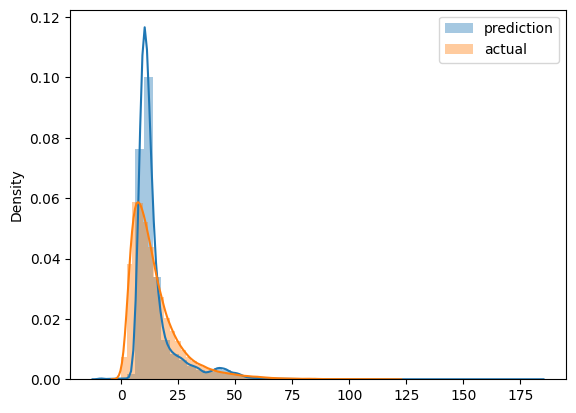

In [90]:
# sns.distplot(y_pred, label='prediction')
# sns.distplot(y_train, label='actual')

# plt.legend()

In [91]:
# y_pred

array([11.61735437, 11.56348051,  9.12657881, ...,  8.22068601,
        8.60358436, 17.48594884])

In [92]:
# y_pred.max()

181.70361482757215

In [93]:
# # Creating a new DataFrame df_predict
# df_predict = pd.DataFrame()
# df_predict['duration'] = df_filter.duration
# df_predict['duration_prediction'] = y_pred

In [94]:
# df_predict

,duration,duration_prediction
0,11.733333,11.617354
2,8.033333,11.563481
3,6.583333,9.126579
4,3.683333,7.994566
5,6.066667,8.549168
...,...,...
49994,12.783333,12.916187
49995,2.983333,7.648899
49996,3.033333,8.220686
49998,8.783333,8.603584


In [95]:
# df_predict[df_predict['duration_prediction'] >= 100 ]

,duration,duration_prediction
2078,74.666667,181.703615
2425,64.350000,112.937949
9087,62.950000,144.680027
12226,108.366667,107.862150
13272,69.466667,102.516880
20454,64.616667,131.684267
32228,104.033333,104.527422
32968,102.583333,100.299299
38850,100.550000,100.642320
39040,109.250000,100.133906


In [96]:
# mean_squared_error(y_train,y_pred,squared = False)

6.390290337397437

In [6]:
def read_df(filename):
    df = pd.read_parquet(filename)
    
    df_filter = df.copy()
    df_filter = df_filter.sample(n=50000).reset_index(drop=True)
    
    df_filter['duration'] = df_filter.tpep_dropoff_datetime -  df_filter.tpep_pickup_datetime
    df_filter['duration'] = df_filter.duration.apply(lambda td: td.total_seconds()/ 60)

    df_filter = df_filter[(df_filter.duration > 0) & (df_filter.duration <= 120)]
    df_filter = df_filter[df_filter.passenger_count > 0]
    df_filter = df_filter[df_filter.fare_amount > 0]
    df_filter = df_filter[df_filter.trip_distance > 0]
    
    df_filter.reset_index(drop=True)
    
    categorical = ['PULocationID','DOLocationID']
    numerical = ['trip_distance']
    
    df_filter[categorical] = df_filter[categorical].astype(str)
    
    return df_filter
    

In [7]:
df_train = read_df('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet') # January
df_val = read_df('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-02.parquet') # February

In [8]:
len(df_train), len(df_val)

(45848, 45209)

In [9]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [10]:
categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [11]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [114]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

6.591458593541191

In [115]:
print(f"MAPE ={mean_absolute_percentage_error(y_val, y_pred)}")

MAPE =0.410092089344326


In [116]:
lr = Lasso(0.01)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

7.224398901479908

In [117]:
print(f"MAPE ={mean_absolute_percentage_error(y_val, y_pred)}")

MAPE =0.5884934310010169


In [118]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

In [19]:
with mlflow.start_run():

    mlflow.set_tag("developer","ahmadluay")

    mlflow.log_param("train-data-path", "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet")
    mlflow.log_param("valid-data-path", "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-02.parquet")    

    alpha = 0.01
    mlflow.log_param("alpha", alpha)    
    lr = Lasso(alpha)
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_val)    
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    mape = mean_absolute_percentage_error(y_val, y_pred)
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("MAPE", mape)

    mlflow.log_artifact(local_path="models/lin_reg.bin", artifact_path="models_pickle")
    

In [21]:
import xgboost as xgb

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope

In [123]:
train = xgb.DMatrix(X_train, label=y_train)
valid = xgb.DMatrix(X_val, label=y_val)

In [124]:
def objective(params):
    with mlflow.start_run():
        mlflow.set_tag("model", "xgboost")
        mlflow.log_params(params)
        booster = xgb.train(
            params=params,
            dtrain=train,
            num_boost_round=1000,
            evals=[(valid, 'validation')],
            early_stopping_rounds=50
        )
        y_pred = booster.predict(valid)
        rmse = mean_squared_error(y_val, y_pred, squared=False)
        mape = mean_absolute_percentage_error(y_val, y_pred)
        mlflow.log_metric("rmse", rmse)

    return {'loss': rmse, 'status': STATUS_OK}

In [31]:
with mlflow.start_run():
    # Define and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Log model parameters
    mlflow.log_param("fit_intercept", model.fit_intercept)
    mlflow.log_param("normalize", model.normalize if hasattr(model, 'normalize') else "N/A")
    
    # Make predictions
    y_pred = model.predict(X_val)
    
    # Calculate and log RMSE
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    mlflow.log_metric("rmse", rmse)
    
    # Save and log the preprocessor
    with open("models/preprocessor.b", "wb") as f_out:
        pickle.dump(dv, f_out)
    mlflow.log_artifact("models/preprocessor.b", artifact_path="preprocessor")
    
    # Log the model
    mlflow.sklearn.log_model(model, artifact_path="models_mlflow") 

In [125]:
# search_space = {
#     'max_depth': scope.int(hp.quniform('max_depth', 4, 100, 1)),
#     'learning_rate': hp.loguniform('learning_rate', -3, 0),
#     'reg_alpha': hp.loguniform('reg_alpha', -5, -1),
#     'reg_lambda': hp.loguniform('reg_lambda', -6, -1),
#     'min_child_weight': hp.loguniform('min_child_weight', -1, 3),
#     'objective': 'reg:linear',
#     'seed': 42
# }

# best_result = fmin(
#     fn=objective,
#     space=search_space,
#     algo=tpe.suggest,
#     max_evals=50,
#     trials=Trials()
# )

[0]	validation-rmse:11.46856                                                   
[1]	validation-rmse:10.99763                                                   
[2]	validation-rmse:10.56733                                                   
[3]	validation-rmse:10.17478                                                   
[4]	validation-rmse:9.81720                                                    
[5]	validation-rmse:9.49177                                                    
[6]	validation-rmse:9.19677                                                    
[7]	validation-rmse:8.92911                                                    
[8]	validation-rmse:8.68696                                                    
[9]	validation-rmse:8.46839                                                    
[10]	validation-rmse:8.27122                                                   
[11]	validation-rmse:8.09366                                                   
[12]	validation-rmse:7.93381            

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[38]	validation-rmse:6.73367                                                   
[39]	validation-rmse:6.73404                                                   
[40]	validation-rmse:6.73588                                                   
[41]	validation-rmse:6.73687                                                   
[42]	validation-rmse:6.73686                                                   
[43]	validation-rmse:6.73791                                                   
[44]	validation-rmse:6.73778                                                   
[45]	validation-rmse:6.73889                                                   
[46]	validation-rmse:6.73920                                                   
[47]	validation-rmse:6.73960                                                   
[48]	validation-rmse:6.73965                                                   
[49]	validation-rmse:6.74079                                                   
[50]	validation-rmse:6.74131            

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[51]	validation-rmse:6.44036                                                   
[52]	validation-rmse:6.43753                                                   
[53]	validation-rmse:6.43485                                                   
[54]	validation-rmse:6.43249                                                   
[55]	validation-rmse:6.43034                                                   
[56]	validation-rmse:6.42811                                                   
[57]	validation-rmse:6.42630                                                   
[58]	validation-rmse:6.42543                                                   
[59]	validation-rmse:6.42389                                                   
[60]	validation-rmse:6.42301                                                   
[61]	validation-rmse:6.42159                                                   
[62]	validation-rmse:6.42038                                                   
[63]	validation-rmse:6.41939            

In [23]:
mlflow.xgboost.autolog(disable=True)

In [24]:
with mlflow.start_run():
    train = xgb.DMatrix(X_train, label=y_train)
    valid = xgb.DMatrix(X_val, label=y_val)
    
    best_params = {
        'learning_rate': 0.11426289137641882,
        'max_depth': 11,
        'min_child_weight': 2.7616063042953516,
        'objective': 'reg:linear',
        'reg_alpha': 0.10962376462418243,
        'reg_lambda': 0.2112226596955094,
        'seed': 42
    }
    
    mlflow.log_params(best_params)
    
    booster = xgb.train(
            params=best_params,
            dtrain=train,
            num_boost_round=1000,
            evals=[(valid, 'validation')],
            early_stopping_rounds=50
        )
    
    y_pred = booster.predict(valid)
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    mlflow.log_metric("rmse", rmse)

    with open("models/preprocessor.b", "wb") as f_out:
        pickle.dump(dv, f_out)
    mlflow.log_artifact("models/preprocessor.b", artifact_path="preprocessor")

    mlflow.xgboost.log_model(booster, artifact_path="models_mlflow")    

[0]	validation-rmse:11.25588
[1]	validation-rmse:10.48257
[2]	validation-rmse:9.82985
[3]	validation-rmse:9.27788
[4]	validation-rmse:8.81520
[5]	validation-rmse:8.43008
[6]	validation-rmse:8.10927
[7]	validation-rmse:7.84319
[8]	validation-rmse:7.62463
[9]	validation-rmse:7.44323
[10]	validation-rmse:7.29480
[11]	validation-rmse:7.17201
[12]	validation-rmse:7.07339
[13]	validation-rmse:6.99102
[14]	validation-rmse:6.92236
[15]	validation-rmse:6.86672
[16]	validation-rmse:6.82030
[17]	validation-rmse:6.78144
[18]	validation-rmse:6.74877
[19]	validation-rmse:6.72199
[20]	validation-rmse:6.69880
[21]	validation-rmse:6.67953
[22]	validation-rmse:6.66372
[23]	validation-rmse:6.64975
[24]	validation-rmse:6.63740
[25]	validation-rmse:6.62645
[26]	validation-rmse:6.61770
[27]	validation-rmse:6.61038
[28]	validation-rmse:6.60402
[29]	validation-rmse:6.59769
[30]	validation-rmse:6.59120
[31]	validation-rmse:6.58652
[32]	validation-rmse:6.58254
[33]	validation-rmse:6.57867
[34]	validation-rmse:6

# Predict

In [25]:

logged_model = 'runs:/7c331a5cbd1a44a0b5f6e598ceba552c/models_mlflow'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)



In [26]:
loaded_model

mlflow.pyfunc.loaded_model:
  artifact_path: models_mlflow
  flavor: mlflow.xgboost
  run_id: 7c331a5cbd1a44a0b5f6e598ceba552c

In [27]:
xgboost_model = mlflow.xgboost.load_model(logged_model)

In [28]:
xgboost_model

In [29]:
y_pred = xgboost_model.predict(valid)

In [30]:
y_pred[:10]

array([ 3.4953442, 11.952303 ,  7.8792887,  8.036506 , 13.316409 ,
       12.8893   , 16.969467 , 10.08655  , 19.040792 , 15.436665 ],
      dtype=float32)